In [0]:
import numpy
import keras
from keras.datasets import mnist
import matplotlib.pyplot as plt
from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Activation

In [2]:
# load the data
(x_train, y_train), (x_test, y_test) = mnist.load_data()

print(x_train.shape)

11493376/11490434 [==============================] - 2s 0us/step
(60000, 28, 28)


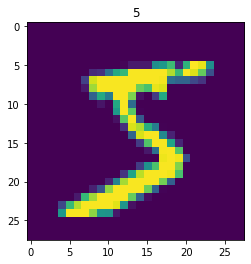

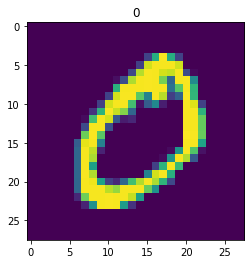

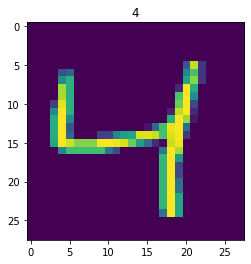

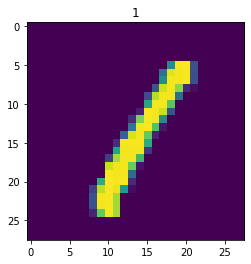

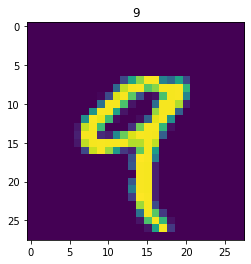

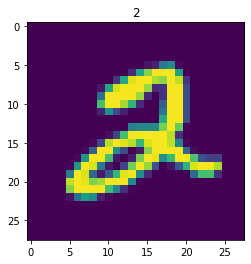

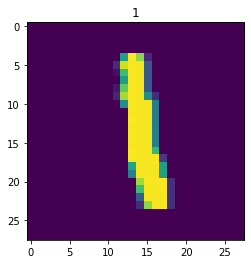

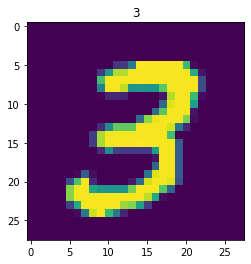

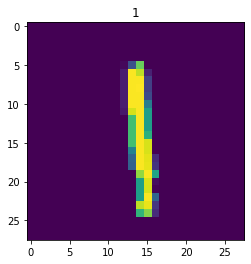

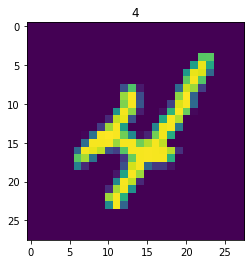

In [5]:
# sanity checks
for i in range(10):
  plt.imshow(x_train[i])
  plt.title(y_train[i])
  plt.show()

In [0]:
# change img shape to one dimensional for dense layer input
x_train = x_train.reshape(60000, 28*28)
x_test = x_test.reshape(10000, 28*28)

In [7]:
print(x_train[0].shape)

(784,)


In [0]:
#normalize data to reduce the range of values
x_train = x_train / 255 
x_test = x_test / 255

In [0]:
# change form of y data from scalar to one-hot vector, to allow probabalistic data
num_classes = 10
y_train = np_utils.to_categorical(y_train, num_classes)
y_test = np_utils.to_categorical(y_test, num_classes)

In [14]:
print(y_train.shape)

(60000, 10)


In [0]:
# make model
model = Sequential()
#first layer
model.add(Dense(512, input_shape=(784,)))
model.add(Activation('relu'))
#second layer
model.add(Dense(256))
model.add(Activation('relu'))
#third layer
model.add(Dense(10))
model.add(Activation('softmax'))

In [0]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [29]:
model.fit(x_train, y_train, batch_size=128, epochs=30, verbose=1, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/30
60000/60000 [==============================] - 7s 117us/step - loss: 0.8555 - acc: 0.7482 - val_loss: 0.4131 - val_acc: 0.8804
Epoch 2/30
60000/60000 [==============================] - 7s 116us/step - loss: 0.3582 - acc: 0.8949 - val_loss: 0.3080 - val_acc: 0.9102
Epoch 3/30
60000/60000 [==============================] - 7s 114us/step - loss: 0.3013 - acc: 0.9123 - val_loss: 0.2751 - val_acc: 0.9180
Epoch 4/30
60000/60000 [==============================] - 7s 113us/step - loss: 0.2630 - acc: 0.9234 - val_loss: 0.2596 - val_acc: 0.9215
Epoch 5/30
60000/60000 [==============================] - 7s 114us/step - loss: 0.2302 - acc: 0.9323 - val_loss: 0.2325 - val_acc: 0.9313
Epoch 6/30
60000/60000 [==============================] - 7s 115us/step - loss: 0.2023 - acc: 0.9407 - val_loss: 0.1903 - val_acc: 0.9447
Epoch 7/30
60000/60000 [==============================] - 7s 114us/step - loss: 0.1782 - acc: 0.9478 - val_loss: 0.1703 - 

In [0]:
# predict on your own data
prediction = model.predict(x_test)
# replace x_test with your own dataset!

In [52]:
#compare
prediction[0]

array([1.9926290e-09, 1.9748758e-09, 2.0060379e-06, 1.4575348e-04,
       5.5685789e-13, 1.1922202e-09, 1.0955658e-19, 9.9984980e-01,
       3.0792954e-08, 2.3787441e-06], dtype=float32)

In [53]:
print(y_test[0])

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
